## Install and import dependencies
- Use tensorflow dataset to download the MNIST Fashion dataset


In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.3.2)


In [2]:
try:
  # if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


TensorFlow 2.x selected.


In [0]:
# importing the tensorflow dataset
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Other libraies
import math
import numpy as np
import matplotlib.pyplot as plt


In [0]:
import logging 
logger =tf.get_logger()
logger.setLevel(logging.ERROR)

## Importing MNIST Fastion Dataset 
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True,with_info=True)

train_dataset ,test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

## Exploring the data 

In [7]:
num_train_examples= metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print("Number of training example: {}".format(num_train_examples))
print("Number of testing example: {}".format(num_test_examples))

Number of training example: 60000
Number of testing example: 10000


## Data pre-processing
We normalizes each pixel value of an image in that range [0,1]

In [0]:
def normalize(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,labels

# map functions applies the Normalize function to each of the element
# in the train as well as test dataset.
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

### Exploring the pre processed data
We take a single image and reshape it using the numpy().reshape() to remove the color dimension.  

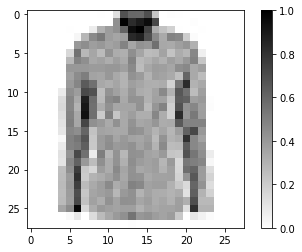

In [9]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Ploting the image ---> which is a peice of a fashion clothing.
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

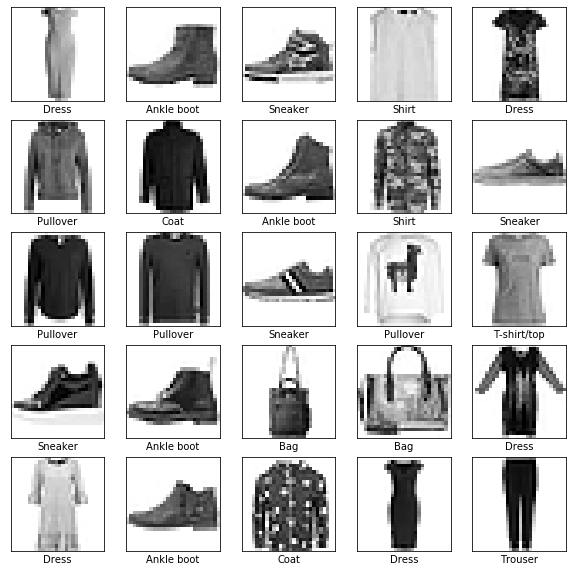

In [10]:
# Displaying the first 50 images from the training dataset with the class name 
# so that we can verify that the data is correct
plt.figure(figsize=(10,10))
i=0
for (image,label) in train_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

## Building a Model
1. Configuring the layers of the model
2. Compiling the model


### 1. Configuring the layers.
A layer is a basic building block of the NN. A layer extracts a representation from the data fed into it. 

Series of layers results in meaningful representation.

Deep Learning consists of chaninig together simple layers. Much of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have internal parameters which are adjusted ("learned") during training.

In [0]:
model =  tf.keras.Sequential([
            # The first layer is a Conv2D filters (3,3) being applied to the input image, retaining the original image size by using padding,
            # and creating 32 output (convoluted) images (so this layer creates 32 convoluted images of the same size as input). 
            tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2), # the 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2.
            #  Next, Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs which are again reduced in size by a MaxPooling2D layer
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(), 
            tf.keras.layers.Dense(128,activation=tf.nn.relu), # A dense connected layers of 128 neurons
            tf.keras.layers.Dense(10,activation=tf.nn.softmax) # 10-nodes represented as output nodes for each class of clothing. 
                              ])

There are 3 layers in the NN
- Input `tf.keras.layers.Flatten`: This layer has nothing to learn it only reformats the input image data (2D to 1 D array)
- hidden `tf.keras.layers.Dense`: Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.
- output `tf.keras.layers.Dense`: As in the previous layer, each node takes input from the 128 nodes in the layer before it. Each node weights the input according to learned parameters, and then outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

### 2. Compiling the model

In [0]:
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy']) # used to moniter traning and testing steps, in this case we uses
    #accuarcy to moniter the images that are classified correctly. 

## Training the Model

In [0]:
BATCH_SIZE =32
# repeat forever using `dataset.repeat()`
# `using dataset.shuffle(60000)` we ramdomize the order so the our model 
# doesnot learn anything from the order of the examples
# `dataset.batch(32)` tells model.fit to use bacth of 32 images and labels 
# when updating the model variable. 
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
# Training is performed by calling `model.fit`
# Feed the training data 
# `epochs=10` limits training to 5 full iterations the training dataset. 
model.fit(train_dataset,epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3942 - accuracy: 0.8587
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2625 - accuracy: 0.9048
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2165 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1843 - accuracy: 0.9317
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1544 - accuracy: 0.9430
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1327 - accuracy: 0.9519
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1064 - accuracy: 0.9607
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0943 - accuracy: 0.9657
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9718
Epoch 10/10
1875/1875 [==============================] - 8s

## Evaluting the Accuracy of the model
It demostrarte the performance of the modelon the test dataset.

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Accuracy on the test dataset", test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.3395 - accuracy: 0.9161
Accuracy on the test dataset 0.9161


# Making prediction and exploring the different cases

In [16]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
print(predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0])) 
print(test_labels[0])

(32, 10)
[4.5733812e-09 4.2634793e-12 9.6394513e-05 1.4379123e-07 2.3686978e-01
 2.3695193e-12 7.6303369e-01 2.4567530e-09 2.2828905e-12 6.5534678e-12]
6
6


Building a graph to look at the full set of 10 class predictions 


In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


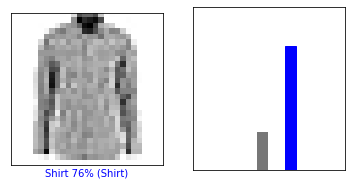

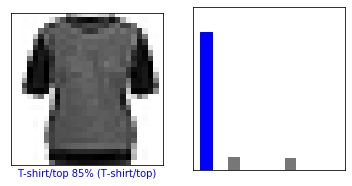

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

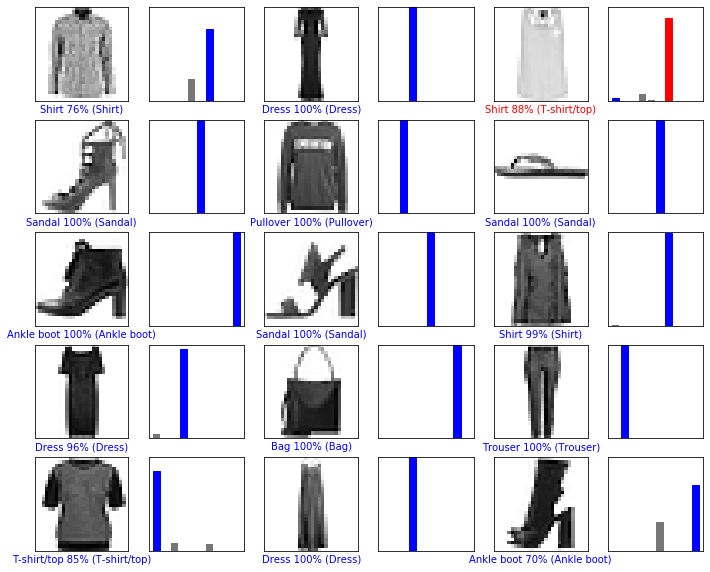

In [19]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Shape of the selected image from  the test dataset:  (28, 28, 1)
Shape of the image after adding the image to the batch:  (1, 28, 28, 1)
Prediction array from the softmax layer:  [[4.5733812e-09 4.2634880e-12 9.6394513e-05 1.4379110e-07 2.3686978e-01
  2.3695282e-12 7.6303369e-01 2.4567577e-09 2.2828989e-12 6.5534934e-12]]
The max probabilty from the output Array:  6


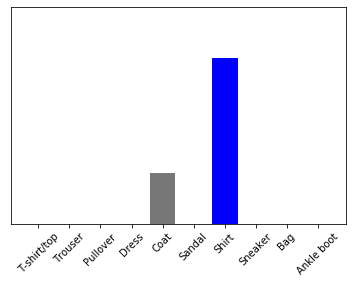

In [20]:
# Grab an image from the test dataset
img = test_images[0]

print("Shape of the selected image from  the test dataset: ",img.shape)

# Add the image to a batch where it's the only member.
img = np.array([img])

print("Shape of the image after adding the image to the batch: ",img.shape)


# Making prediction
predictions_single = model.predict(img)

print("Prediction array from the softmax layer: ",predictions_single)

plot_value_array(0, predictions_single, test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)

print("The max probabilty from the output Array: ", np.argmax(predictions_single[0]))